## Librerías

In [42]:
import numpy as np
import pandas as pd
import string
import re

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import nltk
from nltk.corpus import stopwords

from sklearn.preprocessing import StandardScaler

## Importación y selección de datos

In [34]:
tweets   = pd.read_csv("https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/master/datos/datos_tweets_@elonmusk.csv")
tweets.head()

,screen_name,user_id,created_at,status_id,text,retweet_count,favorite_count,is_quote_status,quote_status_id,is_retweet,...,hashtags,coordinates,place_id,place_type,place_name,place_full_name,country_code,country,bounding_box_coordinates,bounding_box_type
0,elonmusk,44196397,2017-11-09T17:28:57Z,9.286758e+17,"""If one day, my words are against science, cho...",49919,104722,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,elonmusk,44196397,2017-11-09T17:12:46Z,9.286717e+17,I placed the flowers\n\nThree broken ribs\nA p...,5940,33725,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,elonmusk,44196397,2017-11-08T18:55:13Z,9.283351e+17,Atatürk Anıtkabir https://t.co/al3wt0njr6,34752,104823,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,elonmusk,44196397,2017-11-07T19:48:45Z,9.279862e+17,"@Bob_Richards One rocket, slightly toasted",415,7247,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,elonmusk,44196397,2017-10-28T21:36:18Z,9.243894e+17,@uncover007 500 ft so far. Should be 2 miles l...,207,2128,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678 entries, 0 to 2677
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   screen_name                     2678 non-null   object 
 1   user_id                         2678 non-null   int64  
 2   created_at                      2678 non-null   object 
 3   status_id                       2678 non-null   float64
 4   text                            2678 non-null   object 
 5   retweet_count                   2678 non-null   int64  
 6   favorite_count                  2678 non-null   int64  
 7   is_quote_status                 2678 non-null   bool   
 8   quote_status_id                 97 non-null     float64
 9   is_retweet                      2678 non-null   bool   
 10  retweet_status_id               0 non-null      float64
 11  in_reply_to_status_status_id    1564 non-null   float64
 12  in_reply_to_status_user_id      15

In [14]:
tweets = tweets[['created_at', 'status_id', 'text']]
tweets.columns = ['fecha', 'id', 'texto']

# Parseo de fechas
tweets['fecha'] = pd.to_datetime(tweets['fecha'])
tweets.head()

,fecha,id,texto
0,2017-11-09 17:28:57+00:00,9.286758e+17,"""If one day, my words are against science, cho..."
1,2017-11-09 17:12:46+00:00,9.286717e+17,I placed the flowers\n\nThree broken ribs\nA p...
2,2017-11-08 18:55:13+00:00,9.283351e+17,Atatürk Anıtkabir https://t.co/al3wt0njr6
3,2017-11-07 19:48:45+00:00,9.279862e+17,"@Bob_Richards One rocket, slightly toasted"
4,2017-10-28 21:36:18+00:00,9.243894e+17,@uncover007 500 ft so far. Should be 2 miles l...


## tokenización y stopwords

In [15]:
def limpiar_tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    
    # Se convierte todo el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    
    return(nuevo_texto)

tweets['texto_token'] = tweets['texto'].apply(lambda x: limpiar_tokenizar(x))
tweets[['texto','texto_token']].head()

,texto,texto_token
0,"""If one day, my words are against science, cho...","[if, one, day, my, words, are, against, scienc..."
1,I placed the flowers\n\nThree broken ribs\nA p...,"[placed, the, flowers, three, broken, ribs, pi..."
2,Atatürk Anıtkabir https://t.co/al3wt0njr6,"[atatürk, anıtkabir]"
3,"@Bob_Richards One rocket, slightly toasted","[bob, richards, one, rocket, slightly, toasted]"
4,@uncover007 500 ft so far. Should be 2 miles l...,"[uncover, ft, so, far, should, be, miles, long..."


In [16]:
# se crea una fila por cada elemento de la lista (token)
tweets_tidy = tweets.explode(column='texto_token')
# eliminamos texto original
tweets_tidy = tweets_tidy.drop(columns='texto')
tweets_tidy = tweets_tidy.rename(columns={'texto_token':'token'})
tweets_tidy.head()

,fecha,id,token
0,2017-11-09 17:28:57+00:00,9.286758e+17,if
0,2017-11-09 17:28:57+00:00,9.286758e+17,one
0,2017-11-09 17:28:57+00:00,9.286758e+17,day
0,2017-11-09 17:28:57+00:00,9.286758e+17,my
0,2017-11-09 17:28:57+00:00,9.286758e+17,words


In [22]:
stop_words = list(stopwords.words('english'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("amp", "xa", "xe"))
tweets_tidy = tweets_tidy[~(tweets_tidy["token"].isin(stop_words))]

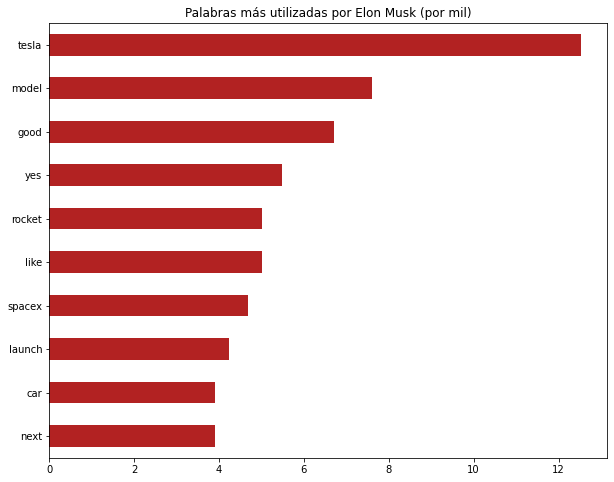

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
# df temporal con top 10 palabras medidas por mil
counts  = tweets_tidy['token'].value_counts(ascending=False)*1000 / len(tweets_tidy)
counts = counts.head(10)
# colores e inversión de barplot
counts.plot(kind='barh', color='firebrick', ax=ax)
ax.invert_yaxis()
ax.set_title("Palabras más utilizadas por Elon Musk (por mil)")
# para que quede bonito
fig.tight_layout()

## Análisis de sentimientos

In [26]:
# Descarga lexicon sentimientos
lexicon = pd.read_table(
            'https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt',
            names = ['termino', 'sentimiento']
          )
lexicon.head()

,termino,sentimiento
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [27]:
# Sentimiento promedio de cada tweet
tweets_sentimientos = pd.merge(
                            left     = tweets_tidy,
                            right    = lexicon,
                            left_on  = "token", # token de los tweets
                            right_on = "termino", # palabras del diccionario
                            how      = "inner" # palabra en token
                      )

tweets_sentimientos = tweets_sentimientos.drop(columns = "termino")

# Se suman los sentimientos de las palabras que forman cada tweet.
tweets_sentimientos = tweets_sentimientos[["fecha", "id", "sentimiento"]] \
                      .groupby(["fecha", "id"])\
                      .sum().reset_index()
tweets_sentimientos.head()

,fecha,id,sentimiento
0,2013-03-17 18:20:24+00:00,3.133541e+17,-2
1,2013-03-17 18:32:54+00:00,3.133573e+17,6
2,2013-03-20 01:00:37+00:00,3.141796e+17,5
3,2013-03-23 00:04:01+00:00,3.152526e+17,-1
4,2013-03-23 00:26:25+00:00,3.152582e+17,0


In [30]:
def perfil_sentimientos(df):
    print(f"Positivos: {round(100 * np.mean(df.sentimiento > 0), 2)}")
    print(f"Neutros  : {round(100 * np.mean(df.sentimiento == 0), 2)}")
    print(f"Negativos: {round(100 * np.mean(df.sentimiento < 0), 2)}")
    print(" ")

perfil_sentimientos(tweets_sentimientos)

Positivos: 73.14
Neutros  : 4.29
Negativos: 22.57
 


## Importación, selección y transformación de datos de acciones

In [31]:
tesla = pd.read_csv("TSLA.csv")
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [33]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [36]:
# cambiamos fecha
df = tesla.rename(columns={'Date': 'fecha'})
df['fecha'] = pd.to_datetime(df['fecha'],  utc=True)
df.head()

,fecha,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29 00:00:00+00:00,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30 00:00:00+00:00,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01 00:00:00+00:00,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02 00:00:00+00:00,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06 00:00:00+00:00,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [37]:
# nos quedamos con fecha y valor medio de las acciones al cierre por semana 
df = df.set_index("fecha")
df = df.dropna()
df = df[['Close']].resample("W-MON").mean()
df.head()

,Close
fecha,
2010-07-05 00:00:00+00:00,22.220000
2010-07-12 00:00:00+00:00,16.764000
2010-07-19 00:00:00+00:00,20.083999
2010-07-26 00:00:00+00:00,20.752000
2010-08-02 00:00:00+00:00,20.496000


In [39]:
# hacemos lo mismo con los sentimientos de los tweets
df1 = tweets_sentimientos.set_index("fecha") # fecha como índice pa que no se borre
df1 = df1[['sentimiento']].resample("W-MON").mean()
df1.head()

,sentimiento
fecha,
2013-03-18 00:00:00+00:00,2.000000
2013-03-25 00:00:00+00:00,1.500000
2013-04-01 00:00:00+00:00,2.857143
2013-04-08 00:00:00+00:00,1.000000
2013-04-15 00:00:00+00:00,2.083333


In [40]:
# unimos datasets
df = pd.merge(df1, df, left_index=True, right_index=True)
df.head()

,sentimiento,Close
fecha,,
2013-03-18 00:00:00+00:00,2.000000,37.078000
2013-03-25 00:00:00+00:00,1.500000,36.238000
2013-04-01 00:00:00+00:00,2.857143,39.460000
2013-04-08 00:00:00+00:00,1.000000,42.129999
2013-04-15 00:00:00+00:00,2.083333,42.600000


## Comparación de sentimientos de tweets y acciones de tesla

In [43]:
# creamos un objeto para estandarizar las columnas
scaler = StandardScaler()

df['sentimiento_norm'] = scaler.fit_transform(df[['sentimiento']])
df['Close_norm'] = scaler.fit_transform(df[['Close']])
df.head()

,sentimiento,Close,sentimiento_norm,Close_norm
fecha,,,,
2013-03-18 00:00:00+00:00,2.000000,37.078000,0.268687,-2.740008
2013-03-25 00:00:00+00:00,1.500000,36.238000,0.002673,-2.752564
2013-04-01 00:00:00+00:00,2.857143,39.460000,0.724711,-2.704402
2013-04-08 00:00:00+00:00,1.000000,42.129999,-0.263341,-2.664492
2013-04-15 00:00:00+00:00,2.083333,42.600000,0.313023,-2.657467


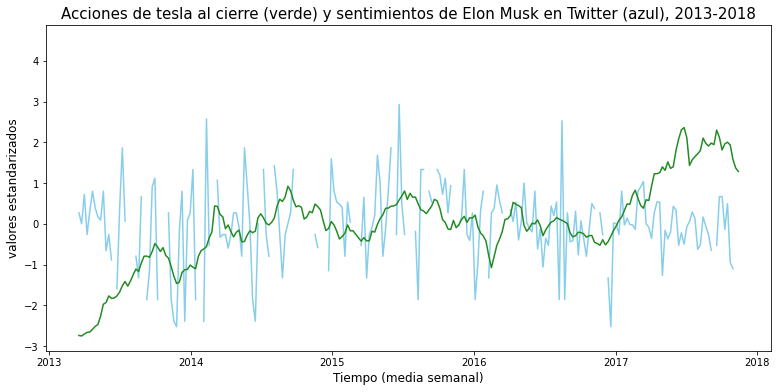

In [46]:
plt.figure(figsize=(13, 6))
plt.plot(df.index, df.sentimiento_norm, color='skyblue')
plt.plot(df.index, df.Close_norm, color='forestgreen')
plt.xlabel("Tiempo (media semanal)", fontsize=12)
plt.ylabel("valores estandarizados", fontsize=12)
plt.title("Acciones de tesla al cierre (verde) y sentimientos de Elon Musk en Twitter (azul), 2013-2018", fontsize=15)
plt.legend;

Podemos observar que, en general, las dos tendencias no se relacionan, salvo quizás en períodos de caída graves, donde sí parece que los tweets de Musk presentan sentimientos más negativos. En cualquier caso, la conclusión más clara es que la variación de los sentimientos parece ser mucho más acusada que la de las acciones (que no son precisamente el ejemplo de datos estables), lo cual hace difícil cualquier predicción. Por otra parte, es claro que durante el primer y el último año analizados, la actividad de Musk en Twitter no parece ser tan "optimista" como cabría esperar.
No obstante, cabe destacar que esta relación ha podido cambiar en años más recientes y que la causalidad de la relación entre las variables no es clara.